In [290]:
%matplotlib inline

In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [292]:
sns.set_context('notebook', font_scale=1.5)

# Data Science Stack

The following exercises give practice in the use of the Python data science stack, especially `pandas` for data manipulation and `seaborn` for quick statistical plotting.

**1**. (40 points) Read in the CSV file `pokemon.csv` in the local directory (Source: Kaggle). Do the following:

- Calculate the number of rows and columns in the data frame (5 points)
- Drop the column `Type 2` without creating a copy of the data frame i.e. in-place (5 points)
- Show a table with 5 rows sampled at random without replacement (5 points)
- Sort the data frame in descending order of `Speed` in-place (5 points)
- Create a column 'Value' where `value = 3*HP + 2*Attack + 1*Defense` (5 points)
- Drop all rows that have the string `Forme` in the `Name` column in-place (5 points)
- Find the mean and variance of `Attack` and `Defense` attributes of all the Type 1 AND Generation subgroups. For instance, one such group would be (Grass, 1). (10 points)

Note: If you change the data frame, print out the first 3 rows after each change with the `head` method.

In [293]:
# Your answer here
pokemon = pd.read_csv("pokemon.csv")
pokemon.shape

(800, 13)

In [294]:
 pokemon.drop('Type 2',axis=1,inplace=True)
pokemon.head(3)

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False


In [295]:
index = np.random.choice(pokemon.shape[0],5,replace=False)
pokemon.ix[index,]

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
744,676,Furfrou,Normal,472,75,80,60,65,90,102,6,False
658,597,Ferroseed,Grass,305,44,50,91,24,86,10,5,False
755,685,Slurpuff,Fairy,480,82,80,86,85,75,72,6,False
98,91,Cloyster,Water,525,50,95,180,85,45,70,1,False
627,566,Archen,Rock,401,55,112,45,74,45,70,5,False


In [296]:
pokemon.sort_values('Speed', ascending = False).head(3)

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
431,386,DeoxysSpeed Forme,Psychic,600,50,95,90,95,90,180,3,True
315,291,Ninjask,Bug,456,61,90,45,50,50,160,3,False
428,386,DeoxysNormal Forme,Psychic,600,50,150,50,150,50,150,3,True


In [297]:
pokemon['Value'] = 3*pokemon['HP'] + 2*pokemon['Attack'] + pokemon['Defense']
pokemon.head(3)

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Value
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False,282
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False,367
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False,487


In [298]:
index = pokemon.Name.str.contains('Forme', case=True, regex= True)
pokemon.drop(pokemon.index[index], inplace=True)
pokemon.head(3)

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Value
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False,282
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False,367
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False,487


In [299]:
subgroup = pokemon.groupby(['Type 1', 'Generation'])['Attack','Defense'].agg([np.mean,np.var])
subgroup.head(3)

Attack                 Defense             
                        mean          var       mean          var
Type 1 Generation                                                
Bug    1           76.428571  2070.879121  60.357143   667.170330
       2           85.416667  2879.356061  93.750000  3227.840909
       3           55.833333   429.969697  54.083333   240.265152

**2**. (30 points) Using the same Pokemon data frame, do the following:
    
- Create a new data frame with the following columns `Name`, `Type 1`, `Generation`, `Feature`, `Score` where `Name`, `Type 1`, `Generation` have the same meaning as in the original data frame, `Feature` is a column containing one of the following strings `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed` and `Score` is the numerical value of the feature. This is known as going from wide-to-tall formats. In R, this operation can be done using the `gatehr` function from the `tidyr` package. (10 points)
- Using the new data frame and the `seaborn` package, create a grid of box plots where the x-axis the Features, the y-axis shows the 'Score', the rows are the Type 1 values, and the columns are the Generation values.  (10 points)
- Using `seaborn`, make a `cluster map` showing the mean values of `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def` and 	`Speed`   for each `Type 1` Pokemon. Rotate the Type 1 lables so they are readable. (10 points)

In [300]:
# Your answer here
pokemon = pokemon.drop(pokemon.columns[[0,3,11,12]],axis=1)
newdf = pd.melt(pokemon, id_vars=['Name','Type 1','Generation'],var_name='Feature',value_name='Score')
newdf.head(3)

,Name,Type 1,Generation,Feature,Score
0,Bulbasaur,Grass,1,HP,45
1,Ivysaur,Grass,1,HP,60
2,Venusaur,Grass,1,HP,80


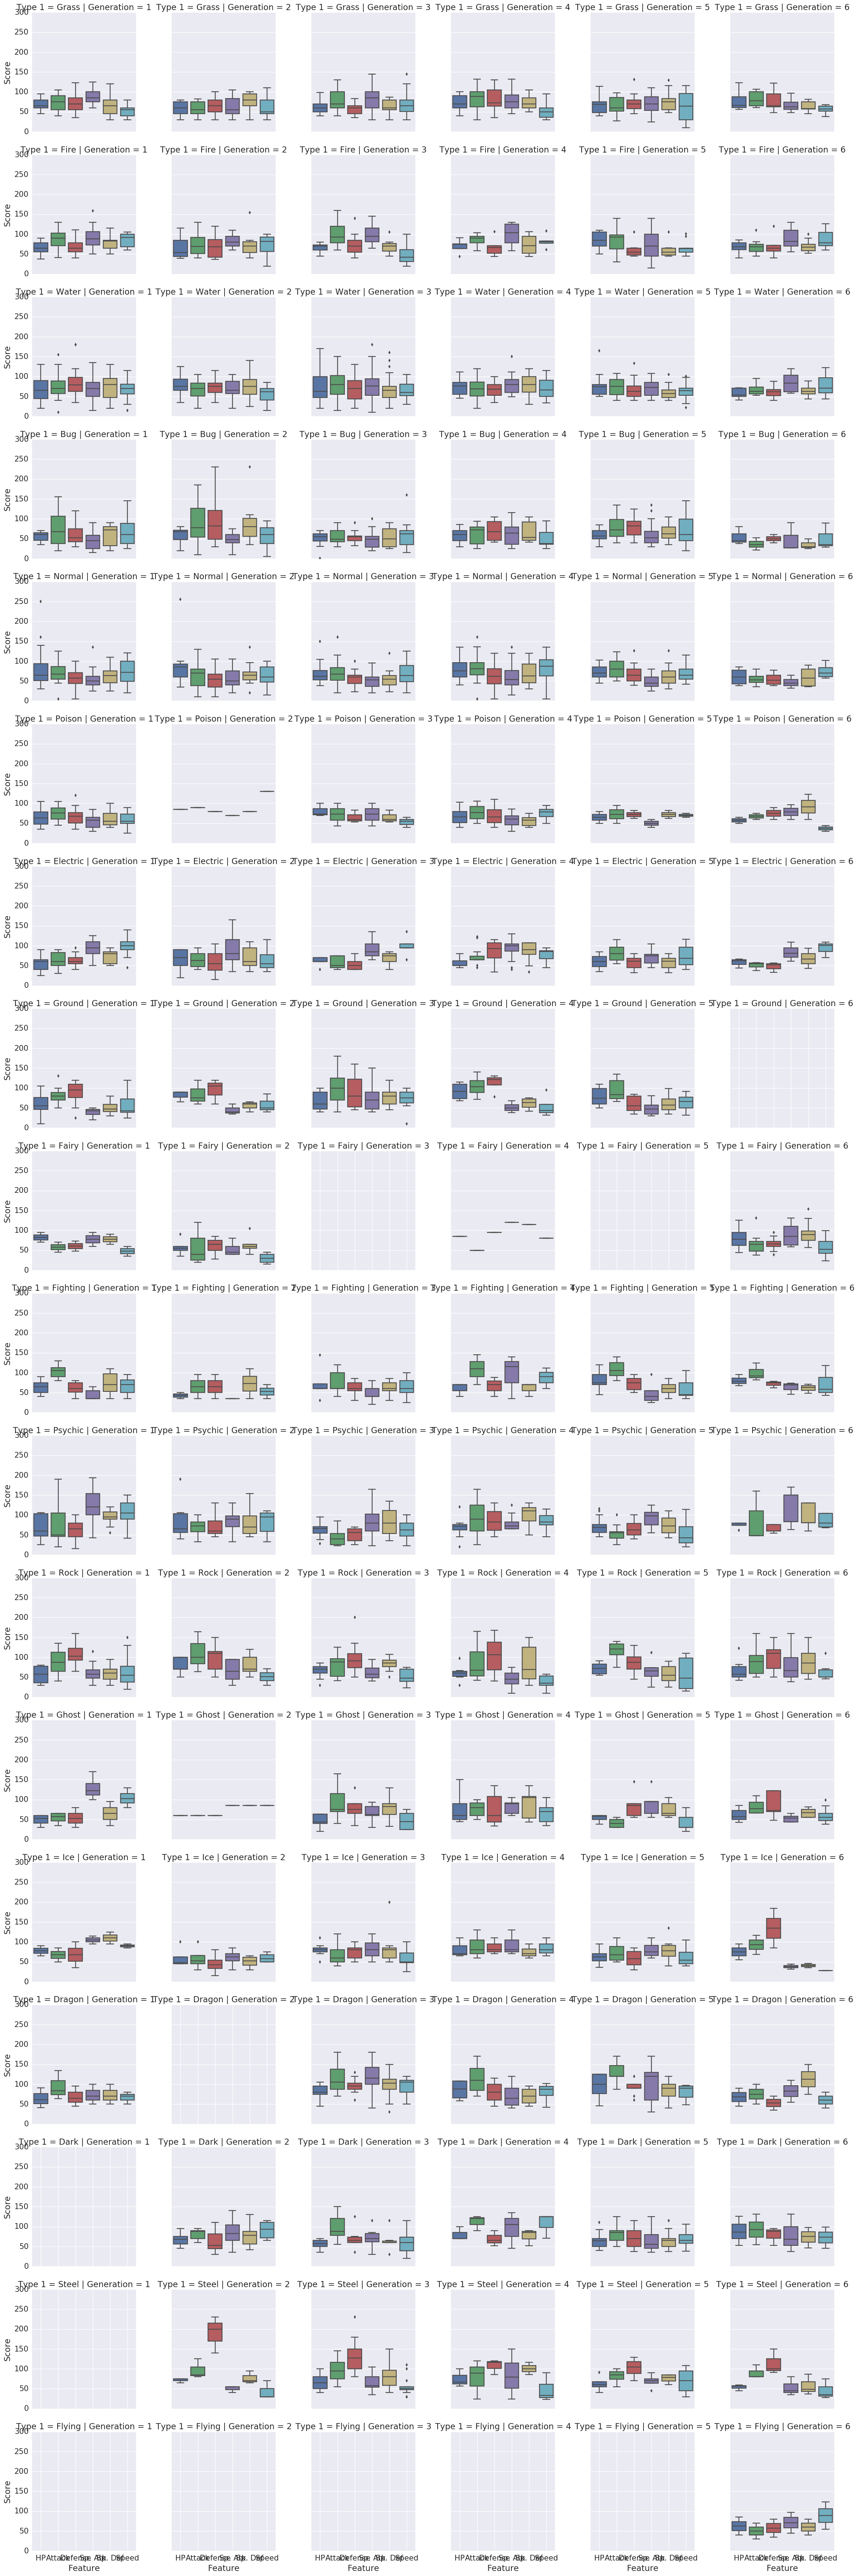

In [301]:
g=sns.factorplot(data = newdf, x = "Feature", y="Score",col="Generation", row="Type 1",kind="box",legend=True)

In [302]:
df2 = pokemon.groupby('Type 1')['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
df2 = df2.mean()

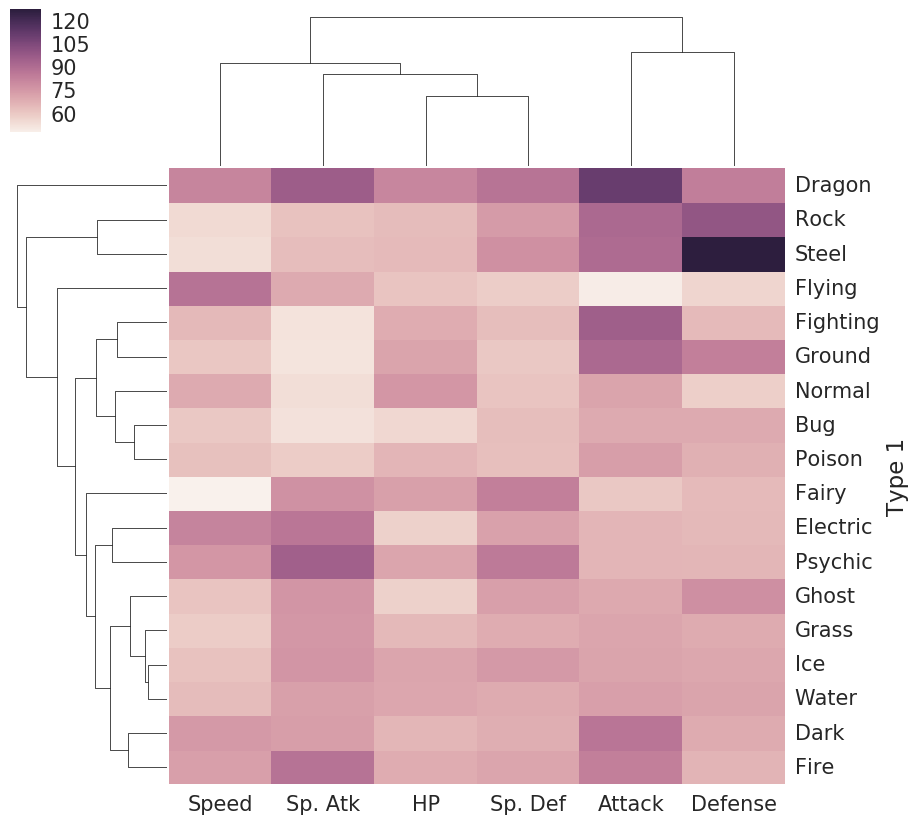

In [303]:
g = sns.clustermap(df2)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
pass

**3**. (30 points) Read in the CSV file `pokemonGo.csv` in the local directory (Source: Kaggle). Do the following:
    
- Create a new data frame with that combines columns from the `pokemon.csv` and `pokemonGO.csv` files. Drop any row that does not have `Name`, `Type 1` and	`Type 2` values that are exactly the same in both data frames. (10 points)
- Write a loop to download the images of Pokemon whose speed is greater than 120. (10 points)
- Display these Pokemon images in the Jupyter notebook. (10 points)

In [304]:
# Your answer here
pokemon = pd.read_csv("pokemon.csv")
pokemonGO = pd.read_csv('pokemonGO.csv')
df3 = pd.merge(pokemon, pokemonGO, on=['Name','Type 1','Type 2'])
df3.head(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Pokemon No.,Max CP,Max HP,Image URL
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1,1079,83,http://cdn.bulbagarden.net/upload/thumb/2/21/0...
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,2,1643,107,http://cdn.bulbagarden.net/upload/thumb/7/73/0...
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,3,2598,138,http://cdn.bulbagarden.net/upload/thumb/a/ae/0...


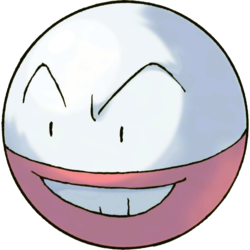

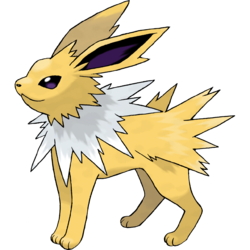

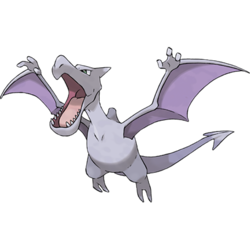

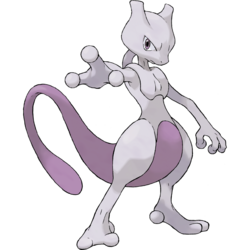

In [305]:

import urllib
from IPython.display import Image, display
df4 = df3[df3.Speed > 120]
input_file = df4['Image URL']
for line in input_file:
    URL= line
    IMAGE = URL.rsplit('/',1)[1]
    urllib.request.urlretrieve(URL, IMAGE)
    display(Image(IMAGE))